In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     6
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     6
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     6
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     6
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     6

[214 rows x 10 columns]

array([<Axes: xlabel='Type'>, <Axes: xlabel='Type'>,
       <Axes: xlabel='Type'>, <Axes: xlabel='Type'>], dtype=object)

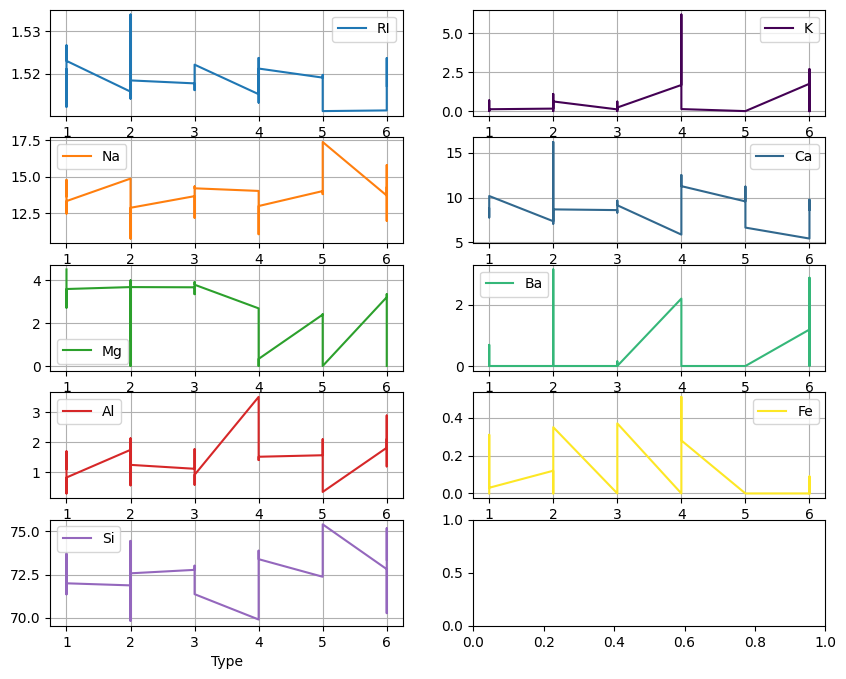

In [3]:
glass_df = pd.read_csv('./data/glass.csv').drop(columns=['Id'])
glass_df['Type'] = glass_df['Type'].map({1: 1, 2:2, 3:3, 5:4, 6:5, 7:6})
fig, axes = plt.subplots(5, 2, figsize=(10, 8))
display(glass_df)
glass_df.loc[:,['RI', 'Na', 'Mg', 'Al', 'Si', 'Type']].plot(x='Type', grid=True, subplots=True, ax=(axes[0][0], axes[1][0], axes[2][0], axes[3][0], axes[4][0]))
glass_df.loc[:,['K', 'Ca', 'Ba', 'Fe', 'Type']].plot(x='Type', grid=True, subplots=True, ax=(axes[0][1], axes[1][1], axes[2][1], axes[3][1]), colormap='viridis')

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(
        glass_df.drop(columns=['Type']), 
        glass_df['Type'],
        train_size=0.75,
        test_size=0.25
    )

knn_pipe = Pipeline([('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(2, 10), 'knn__metric': ['euclidean', 'manhattan', 'cosine']}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=False)

knn_grid.fit(x_train, y_train)
print(knn_grid.best_params_, knn_grid.best_score_, accuracy_score(y_test, knn_grid.predict(x_test)))

{'knn__metric': 'manhattan', 'knn__n_neighbors': 4} 0.725 0.6666666666666666


best:
k: 3, acc: 0.7592592592592593


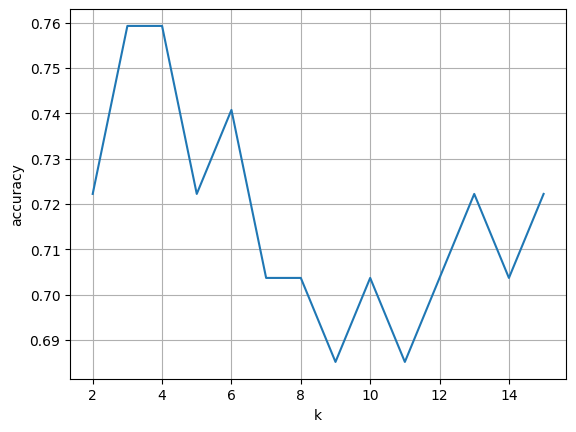

In [5]:
euclidean_test = pd.DataFrame(columns=['k', 'accuracy'])
for k in range(2, 16):
    knc = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knc.fit(X=x_train, y=y_train)
    pred = knc.predict(x_test)
    euclidean_test.loc[k] = {'k': k, 'accuracy': accuracy_score(y_test, pred)}
sns.lineplot(x='k', y='accuracy', data=euclidean_test, markers=True)
plt.grid()
print(f'best:\nk: {euclidean_test.accuracy.idxmax()}, acc: {euclidean_test.accuracy.max()}')

best:
k: 3, acc: 0.7962962962962963


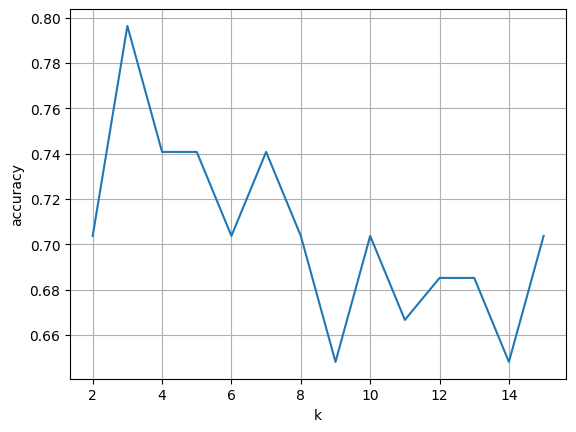

In [6]:
manhattan_test = pd.DataFrame(columns=['k', 'accuracy'])
for k in range(2, 16):
    knc = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knc.fit(X=x_train, y=y_train)
    pred = knc.predict(x_test)
    manhattan_test.loc[k] = {'k': k, 'accuracy': accuracy_score(y_test, pred)}
sns.lineplot(x='k', y='accuracy', data=manhattan_test, markers=True)
plt.grid()
print(f'best:\nk: {manhattan_test.accuracy.idxmax()}, acc: {manhattan_test.accuracy.max()}')

best:
k: 3, acc: 0.8148148148148148


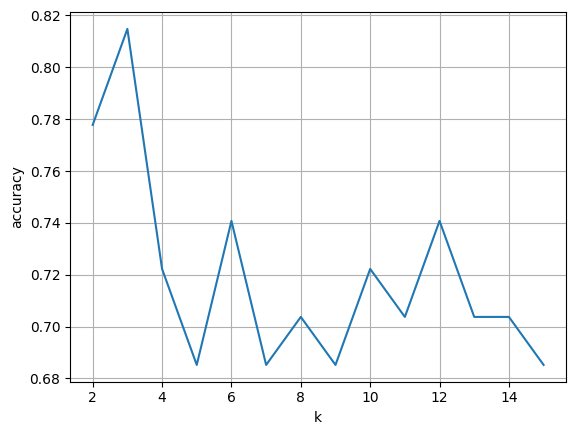

In [7]:
cosine_test = pd.DataFrame(columns=['k', 'accuracy'])
for k in range(2, 16):
    knc = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knc.fit(X=x_train, y=y_train)
    pred = knc.predict(x_test)
    cosine_test.loc[k] = {'k': k, 'accuracy': accuracy_score(y_test, pred)}
sns.lineplot(x='k', y='accuracy', data=cosine_test, markers=True)
plt.grid()
print(f'best:\nk: {cosine_test.accuracy.idxmax()}, acc: {cosine_test.accuracy.max()}')

In [8]:
knc = KNeighborsClassifier(n_neighbors=2, metric='cosine')
knc.fit(X=x_train, y=y_train)
knc.predict(pd.DataFrame([{'RI': 1.516, 'Na': 11.7, 'Mg': 1.01, 'Al': 1.19, 'Si': 72.59, 'K': 0.43, 'Ca': 11.44, 'Ba': 0.02, 'Fe': 0.1}]))

array([4], dtype=int64)